In [16]:
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from inspyhep import InspireRecord, Author

import matplotlib.pyplot as plt
import numpy as np

## Let's start by looking at individual records

In [18]:
SM_paper = InspireRecord('Weinberg:1967tq')

In [19]:
import inspyhep.metadata as mt
from inspect import signature
s = signature(mt.author)

s.parameters.keys()

odict_keys(['full_name_unicode_normalized', 'affiliations_identifiers', 'inspire_roles', 'last_name', 'signature_block', 'uuid', 'id', 'ids', 'record', 'recid', 'curated_relation', 'bai', 'raw_affiliations', 'source', 'first_name', 'affiliations', 'full_name', 'advisors', 'positions', 'project_membership', 'schema', 'arxiv_categories', 'control_number', 'deleted', 'legacy_creation_date', 'legacy_version', 'name', 'status', 'stub', 'urls', 'awards', 'email_addresses'])

In [20]:
print(SM_paper)

print("citation_count:", SM_paper.citation_count)
print("authorlist_bibtex_style:", SM_paper.authorlist_bibtex_style)
print("date:", SM_paper.date)
print("arxiv_number:", SM_paper.arxiv_number)
print("published:", SM_paper.published)
print("pub_title:", SM_paper.pub_title)
print("title:", SM_paper.title)
print(SM_paper.get_bibtex())

Steven Weinberg, Phys.Rev.Lett. 19 (1967).
citation_count: 14151
authorlist_bibtex_style: Weinberg, Steven
date: 1967-11-01
arxiv_number: None
published: True
pub_title: Phys.Rev.Lett.
title: A Model of Leptons
@article{Weinberg:1967tq,
    author = "Weinberg, Steven",
    title = "{A Model of Leptons}",
    doi = "10.1103/PhysRevLett.19.1264",
    journal = "Phys. Rev. Lett.",
    volume = "19",
    pages = "1264--1266",
    year = "1967"
}



In [21]:
# this is a metadata author class
SM_paper.authors

{'Steven.Weinberg.1': author(full_name_unicode_normalized='weinberg, steven', affiliations_identifiers=[], inspire_roles=[], last_name='Weinberg', signature_block='WANBARGs', uuid='5863d7d5-7db1-4d1c-af0c-6408b3584b3e', id='00135339', ids=[{'schema': 'INSPIRE ID', 'value': 'INSPIRE-00135339'}, {'schema': 'INSPIRE BAI', 'value': 'Steven.Weinberg.1'}], record={'ref': 'https://inspirehep.net/api/authors/983868'}, recid=983868, curated_relation=True, bai='Steven.Weinberg.1', raw_affiliations=[], source='', first_name='Steven', affiliations=[{'record': {'ref': 'https://inspirehep.net/api/institutions/903016'}, 'value': 'MIT, LNS'}], full_name='Weinberg, Steven', advisors=[], positions=[], project_membership=[], schema='', arxiv_categories=[], control_number=0, deleted=False, legacy_creation_date='', legacy_version='', name={}, status='', stub=False, urls=[], awards=[], email_addresses=[])}

## Comprehensive author information

In [22]:
SW = Author('Steven.Weinberg.1')

https://inspirehep.net/api/authors?q=ids.value:Steven.Weinberg.1


In [8]:
# Total number of citations
SW.citations

94741

### Let's plot some citation metrics to compare with Inspires

In [9]:
from pylatexenc.latex2text import LatexNodes2Text

In [11]:
years = range(1959, 2021)
citations = []
citations_noself = []
self_citations = []
kwargs = {'max_nauthors': 10}
for y in years:
    citations.append(SW.get_total_number_of_citations(in_year = y, self_cite=True, **kwargs))
    citations_noself.append(SW.get_total_number_of_citations(in_year = y, self_cite=False, **kwargs))
    self_citations.append(citations[-1] - citations_noself[-1])

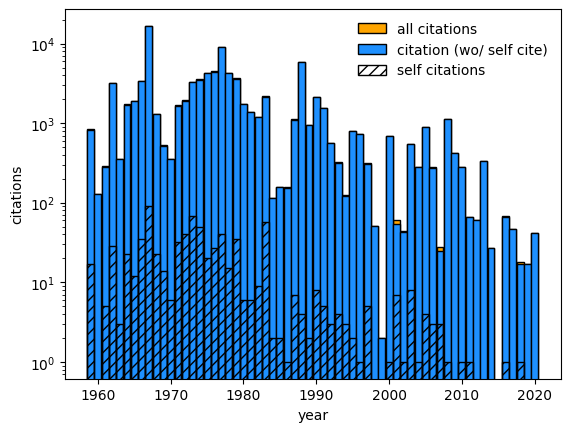

In [14]:
plot_kwargs = {'width': 0.95}
plt.bar(years, citations, fc='orange', ec='black', label=r'all citations', **plot_kwargs)
plt.bar(years, citations_noself, fc='dodgerblue', ec='black', label=r'citation (wo/ self cite)', **plot_kwargs)
plt.bar(years, self_citations, fc='None', ec='black', hatch='///', label=r'self citations', **plot_kwargs)
plt.legend(loc='upper right',frameon=False)
plt.xlabel(r'year')
plt.yscale('log')
plt.ylabel(r'citations')
plt.savefig('plots/Weinbergs_citations.pdf')

## Now some metrics on the number of authors 

In [85]:
nauthors = []
nauthors_wellcited = []
for record in SW.inspire_records.values():
    nauthors.append(record.author_count)
    if record.citation_count > 10:
        nauthors_wellcited.append(record.author_count)


Text(0, 0.5, 'papers')

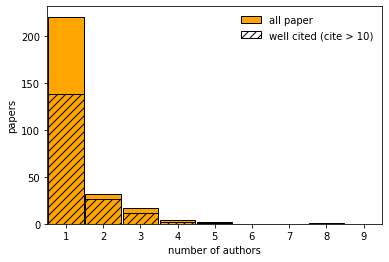

In [86]:
bins = list(range(1,10))
plot_kwargs = {'width': 0.95}
h = np.histogram(nauthors, bins = bins)
h_wc = np.histogram(nauthors_wellcited, bins = bins)
plt.bar(h[1][:-1], h[0], fc='orange', ec='black', label=r'all paper', **plot_kwargs)
plt.bar(h_wc[1][:-1], h_wc[0], fc='None', ec='black', hatch='///', label=r'well cited (cite > 10)', **plot_kwargs)
plt.legend(loc='upper right',frameon=False)
plt.xlabel(r'number of authors')
plt.xticks(bins)
plt.xlim(0.5,9.5)
plt.ylabel(r'papers')

## We can get a nice latex friendly list of your records

In [87]:
print(SW.nice_publication_list(latex_itemize=True, split_peer_review=True))

\textbf{Peer-reviewed publications}
\begin{enumerate}
\item On the Development of Effective Field Theory, Weinberg, Eur.Phys.J.H 46 (2021) 1 6, 2021, arXiv:2101.04241 [hep-th], [citations: 10].
\item Massless particles in higher dimensions, Weinberg, Phys.Rev.D 102 (2020) 9 095022, 2020, arXiv:2010.05823 [hep-th], [citations: 10].
\item Models of Lepton and Quark Masses, Weinberg, Phys.Rev.D 101 (2020) 3 035020, 2020, arXiv:2001.06582 [hep-th], [citations: \textbf{15}].
\item Absorption of Gravitational Waves from Distant Sources, Flauger, Weinberg, Phys.Rev.D 99 (2019) 12 123030, 2019, arXiv:1906.04853 [hep-th], [citations: 7].
\item Soft Bremsstrahlung, Weinberg, Phys.Rev.D 99 (2019) 7 076018, 2019, arXiv:1903.11168 [astro-ph.GA], [citations: 4].
\item Essay: Half a Century of the Standard Model, Weinberg, Phys.Rev.Lett. 121 (2018) 22 220001, 2018, [citations: \textbf{14}].
\item Gravitational Waves in Cold Dark Matter, Flauger, Weinberg, Phys.Rev.D 97 (2018) 12 123506, 2017, arXiv:1

In [88]:
print(SW.get_coauthors(output_file='weinberg_coauthors.csv'))

"Author","Affiliation","Last Active"
"Bousso, Raphael","LBNL, Berkeley","2020"
"Quevedo, Fernando","Cambridge U., DAMTP","2020"
"Flauger, Raphael","UC, San Diego","2019"
"Lucas, Peter","Fermilab","2011"
"Childress, Sam","Fermilab","2011"
"Doe, John","Texas U., Arlington","2011"
"Aymar, Robert","CERN","2011"
"Chu, Steven","Stanford U.","2011"
"McMillan, Edwin","Texas U., Arlington","2011"
"Bush, George","Texas U., Arlington","2011"
"Jackson, Andrew","Texas U., Arlington","2011"
"Dodelson, Scott","Unknown","2009"
"Easther, Richard","Unknown","2009"
"Hanany, Shaul","Unknown","2009"
"McAllister, Liam","Unknown","2009"
"Meyer, Stephan","Unknown","2009"
"Page, Lyman","Unknown","2009"
"Ade, Peter","Unknown","2009"
"Amblard, Alexandre","Unknown","2009"
"Ashoorioon, Amjad","Unknown","2009"
"Baccigalupi, Carlo","Unknown","2009"
"Balbi, Amedeo","Unknown","2009"
"Bartlett, James","Unknown","2009"
"Bartolo, Nicola","Unknown","2009"
"Baumann, Daniel","Unknown","2009"
"Beltran, Maria","Unknown","2009